<a href="https://colab.research.google.com/github/Adityadev-web/infosys-internship/blob/main/Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = '/content/drive/My Drive/US_Dataset/US_Accidents_March23.csv'

cols_needed = ['ID', 'City', 'State', 'Weather_Condition', 'Start_Time', 'End_Time', 'Severity']
df = pd.read_csv(csv_path, usecols=cols_needed, parse_dates=['Start_Time', 'End_Time'], low_memory=False)

print("Loaded rows (selected columns):", len(df))
df.head()

Loaded rows (selected columns): 7728394


,ID,Severity,Start_Time,End_Time,City,State,Weather_Condition
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,Dayton,OH,Light Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,Reynoldsburg,OH,Light Rain
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,Williamsburg,OH,Overcast
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,Dayton,OH,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Dayton,OH,Mostly Cloudy


In [ ]:
categories = ['City', 'State', 'Weather_Condition']

for col in categories:
    unique_count = df[col].nunique(dropna=True)   # count unique values
    top_cat = df[col].value_counts().idxmax()     # most frequent value
    top_count = df[col].value_counts().max()      # frequency
    top_pct = (top_count / len(df)) * 100
    print(f"{col}: {unique_count} unique values. "
          f"Most frequent = {top_cat} ({top_count} occurrences, {top_pct:.2f}%).")


City: 13678 unique values. Most frequent = Miami (186917 occurrences, 2.42%).
State: 49 unique values. Most frequent = CA (1741433 occurrences, 22.53%).
Weather_Condition: 144 unique values. Most frequent = Fair (2560802 occurrences, 33.13%).


In [ ]:
missing_pct = df.isnull().mean() * 100
print("Missing percentage per column:\n", missing_pct)

# List columns with >5% missing values
cols_over_5 = missing_pct[missing_pct > 5]
print("\nColumns with more than 5% missing values:\n", cols_over_5)

Missing percentage per column:
 ID                   0.000000
Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
City                 0.003274
State                0.000000
Weather_Condition    2.244438
dtype: float64

Columns with more than 5% missing values:
 Series([], dtype: float64)


In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

earliest = df['Start_Time'].min()
latest = df['Start_Time'].max()

print("Earliest accident start time:", earliest)
print("Latest accident start time:", latest)

Earliest accident start time: 2016-01-14 20:18:33
Latest accident start time: 2023-03-31 23:30:00


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If you want to remove them:
df = df.drop_duplicates()
print("After removing duplicates, rows left:", len(df))

Number of duplicate rows: 0
After removing duplicates, rows left: 7728394


Percentage of accidents by severity:
 Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: proportion, dtype: float64


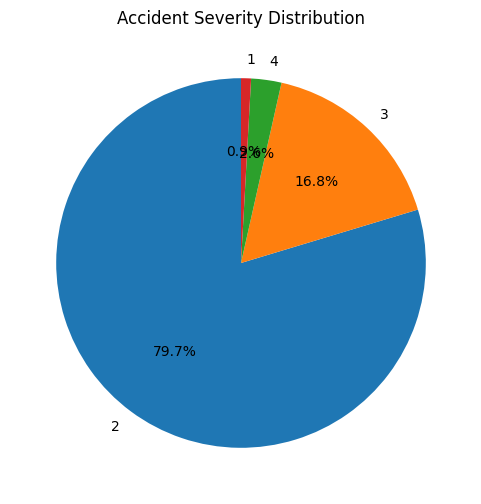

In [ ]:
severity_counts = df['Severity'].value_counts(normalize=True) * 100
print("Percentage of accidents by severity:\n", severity_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution")
plt.show()